# Sección C: Evaluando BOPS en Home & Kitchen

## Introducción

Home & Kitchen es una gran cadena retailer con 84 tiendas en Norte América, 67 de ellas en Estados Unidos y 17 en Canadá. Ha tenido desde el inicio presencia de tiendas físicas y en el 2007 introdujo su tienda online. Ahora cada división, física y online opera como unidad rentable. Después de un fuerte crecimiento de la división online, sus ventas se han estabilizado.

A fin de impulsar las ventas online, en el 2010 se lanzó la iniciativa BOPS (Compre online y recójalo en la tienda, por sus siglas en inglés). Aparte del despacho clásico, los clientes pueden recoger sus compras. Sin embargo BOPS es operacionalmente complejo, y debido a la rivalidad interna entre las divisiones físicas y online los primeros han tenido resistencia al programa BOPS, que sólo ha sido lanzado en Estados Unidos.

En abril del 2012 se tuvieron resultados de las ventas, donde una aparente baja de ventas en ambas divisiones pone en riesgo la continuidad de BOPS. Se pide analizar el caso y recomendar si prosigue la expansión a Canadá y cuantos millones de dólares se ganaron o perdieron con BOPS. 

### Análisis Exploratorio

Iniciaremos cargando las bibliotecas de funciones y los datos que fueron descargados en la carpeta de trabajo. Cada bloque de este notebook se complementará con comentarios para guiar al lector en el procedimiento utilizado.

In [1]:
# Step 0. Cargar bibliotecas y funciones ·······················#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Step 1. Cargar los datos del archivo CSV ·····················#
# 1.1 Cada división tiene su propio archivo, abriremos el canal físico
dataset_bm = pd.read_csv('bops_bm.csv')
# 1.2 Ahora abrimos el canal online
dataset_ol = pd.read_csv('bops_online.csv')

In [3]:
# Step 2. Realizar un análisis exploratorio de datos ···········#
# 2.1. Primero demos un vistazo al dataset del canal físico
dataset_bm

,id (store),year,month,week,usa,after,sales,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1.0,2011.0,4.0,16.0,0.0,0.0,"118,691",NaN,NaN,NaN,NaN
1,1.0,2011.0,4.0,17.0,0.0,0.0,"113,804",NaN,NaN,NaN,NaN
2,1.0,2011.0,4.0,18.0,0.0,0.0,"172,104",NaN,NaN,NaN,NaN
3,1.0,2011.0,5.0,19.0,0.0,0.0,"105,591",NaN,NaN,NaN,NaN
4,1.0,2011.0,5.0,20.0,0.0,0.0,"94,884",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4533,169.0,2012.0,3.0,14.0,1.0,1.0,"67,671",NaN,NaN,NaN,NaN
4534,169.0,2012.0,4.0,15.0,1.0,1.0,"50,140",NaN,NaN,NaN,NaN
4535,169.0,2012.0,4.0,16.0,1.0,1.0,"75,023",NaN,NaN,NaN,NaN
4536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 2.2. Ahora veamos el dataset del canal online
dataset_ol

,id (DMA),year,month,week,after,close,sales,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,2011,4,17,0,1,"18,564",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2011,4,18,0,1,"30,883",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2011,5,19,0,1,"37,425",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2011,5,20,0,1,"32,563",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2011,5,21,0,1,"35,773",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,210,2012,2,10,1,0,"9,357",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10706,210,2012,3,11,1,0,"3,013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10707,210,2012,3,12,1,0,"3,155",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10708,210,2012,3,13,1,0,"2,925",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De acuerdo al diccionario de datos podiamos esperar 7 columnas en el dataset del canal físico, y 7 columnas en el dataset del canal online. Asimismo, vemos que las últimas filas del dataset del canal físico contienen datos NaN. Además un datos que llama la atención es que abril tenga una semana 18, lo cual no concuerda con la tabla de semanas [1]. Pasemos a observar el tipo de datos.

In [5]:
# 2.3. Revisemos el tipo de dato de cada variable del canal físico
dataset_bm.dtypes

id (store)     float64
year           float64
month          float64
week           float64
usa            float64
after          float64
 sales          object
Unnamed: 7     float64
Unnamed: 8     float64
Unnamed: 9     float64
Unnamed: 10    float64
dtype: object

In [6]:
# 2.4. Revisemos el tipo de dato de cada variable del canal online
dataset_ol.dtypes

id (DMA)         int64
year             int64
month            int64
week             int64
after            int64
close            int64
 sales          object
Unnamed: 7     float64
Unnamed: 8     float64
Unnamed: 9     float64
Unnamed: 10    float64
Unnamed: 11    float64
Unnamed: 12    float64
Unnamed: 13    float64
Unnamed: 14    float64
Unnamed: 15    float64
Unnamed: 16    float64
dtype: object

Podemos observar que las ventas no están en el formato númerico que esperamos en ambos datasets. Asimismo, sería práctico convertir el año, mes y semana en un formato fecha a fín de utilizarlo como una variable de serie de tiempo, teniendo como detalle que se considera la semana hasta el domingo. Pasemos a hacer dichas conversiones.

In [7]:
# 2.5 Seleccionamos las primeras 7 columnas en ambos datasets
dataset_bm = dataset_bm.iloc[:,:7]
dataset_ol = dataset_ol.iloc[:,:7]
# 2.6 Retiramos los valores nulos
dataset_bm.dropna(axis = 0, how = 'any', inplace = True)
dataset_ol.dropna(axis = 0, how = 'any', inplace = True)
# 2.7 Convertimos los nombres de los campos de ventas en numérico 
dataset_bm.rename(columns = {dataset_bm.columns[6]:'sales'}, inplace = True)
dataset_ol.rename(columns = {dataset_ol.columns[6]:'sales'}, inplace = True)
# 2.8 Convertimos los campos ventas en numéricos
dataset_bm['sales'] = dataset_bm['sales'].str.replace(',','').astype('float64')
dataset_ol['sales'] = dataset_ol['sales'].str.replace(',','').astype('float64')
# 2.9 Convertimos los campos año, mes y semana en fecha e indexamos
def convertir_anio_mes(el_df):
    el_df['date_week'] = el_df['year'] * 1000 + (el_df['week']-1) * 10 + 1
    # Debido al desfase en las semanas haremos una conversión
    el_df['date_start'] = np.where((el_df['year']==2012) & (el_df['week']==1), \
                                   pd.to_datetime(el_df['year'], format='%Y'), \
                                   pd.to_datetime(el_df['date_week'], format='%Y%W%w'))
convertir_anio_mes(dataset_bm)
convertir_anio_mes(dataset_ol)

In [8]:
# 2.10 Ahora pasemos a ver una descripción de los datos del canal físico
dataset_bm.describe(datetime_is_numeric=True)

,id (store),year,month,week,usa,after,sales,date_week,date_start
count,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4.536000e+03,4536
mean,84.738095,2011.296296,6.314815,26.796296,0.797619,0.500000,63873.317019,2.011555e+06,2011-10-11 12:53:19.999999744
min,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000,2915.000000,2.011151e+06,2011-04-11 00:00:00
25%,42.500000,2011.000000,3.000000,14.000000,1.000000,0.000000,37465.500000,2.011281e+06,2011-07-11 00:00:00
50%,84.000000,2011.000000,6.000000,26.500000,1.000000,0.500000,58165.000000,2.011416e+06,2011-10-13 12:00:00
75%,127.500000,2012.000000,9.000000,40.000000,1.000000,1.000000,84089.750000,2.012021e+06,2012-01-09 00:00:00
max,169.000000,2012.000000,12.000000,53.000000,1.000000,1.000000,286827.000000,2.012151e+06,2012-04-09 00:00:00
std,49.434118,0.456674,3.479549,15.228823,0.401819,0.500055,36531.546280,3.511354e+02,NaN


El dataset del canal físico tiene 4536 observaciones, con un rango de fechas desde abril del 2011 hasta abril del 2012. Por la mediana de la columna "after" podemos observar que la mitad de los datos corresponde a antes de la introducción de BOPS, y el resto a después.

In [9]:
# 2.11 Ahora pasemos a ver una descripción de los datos del canal online
dataset_ol.describe(datetime_is_numeric=True)

,id (DMA),year,month,week,after,close,sales,date_week,date_start
count,10710.000000,10710.000000,10710.000000,10710.00000,10710.000000,10710.000000,10710.000000,1.071000e+04,10710
mean,105.500000,2011.274510,6.450980,27.45098,0.490196,0.480952,13755.704855,2.011540e+06,2011-10-08 04:42:21.176470784
min,1.000000,2011.000000,1.000000,1.00000,0.000000,0.000000,63.000000,2.011161e+06,2011-04-18 00:00:00
25%,53.000000,2011.000000,3.000000,13.00000,0.000000,0.000000,1144.000000,2.011281e+06,2011-07-11 00:00:00
50%,105.500000,2011.000000,7.000000,28.00000,0.000000,0.000000,5567.500000,2.011411e+06,2011-10-10 00:00:00
75%,158.000000,2012.000000,10.000000,41.00000,1.000000,1.000000,17185.750000,2.012011e+06,2012-01-02 00:00:00
max,210.000000,2012.000000,12.000000,53.00000,1.000000,1.000000,319233.000000,2.012131e+06,2012-03-26 00:00:00
std,60.623921,0.446288,3.533278,15.42074,0.499927,0.499660,22411.737794,3.367605e+02,NaN


El dataset del canal online tiene 4536 observaciones, con un rango de fechas desde abril del 2011 hasta abril del 2012. Por la mediana de la columna "after" podemos observar que el corte en la introducción de BOPS es diferente.

### Cuestionario de Preguntas

#### 1. ¿Deberían expandirse a Canadá?

El punto de partida es validar los resultados de ventas presentados en el caso. De acuerdo a la documentación, los periodos de ventas son seis meses antes y seis meses depués de la implementación del programa BOPS (lanzado en octubre). Si bien esto brinda periodos de venta equiparables en total de meses, estos no son equivalentes en capturar la demanda de ciertos meses como diciembre para ambos periodos. 

Pasemos a ver las ventas promedio de cada canal, en un gráfico de líneas.

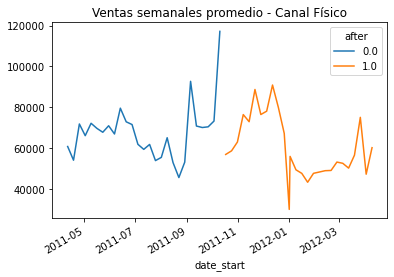

In [10]:
# Aquí hacemos una agregación por el promedio de cada semana del canal físico
dataset_bm.pivot_table(index='date_start', columns='after', values='sales', aggfunc='mean').plot()
plt.title('Ventas semanales promedio - Canal Físico')
plt.show()

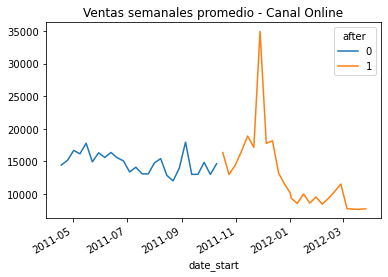

In [11]:
# Aquí hacemos una agregación por el promedio de cada semana del canal online
dataset_ol.pivot_table(index='date_start', columns='after', values='sales', aggfunc='mean').plot()
plt.title('Ventas semanales promedio - Canal Online')
plt.show()

Por los gráficos de líneas vemos en el caso del canal físico una caída aunque no tan marcada, mientras que el canal online inició bien el programa BOPS pero luego tuvo una caída.

Iniciaremos recreando la tabla de diferencias de ventas por canal pre y post implementación de BOPS.

In [12]:
# Primero vamos a pivotar el dataset del canal fisico, y separar las medias semanales pre y post BOPS
base_bm_pv = dataset_bm
base_bm_pv['canal'] = 'fisico'
base_bm_pv = base_bm_pv.pivot_table(index='after',columns = 'canal', values = 'sales', aggfunc = np.mean).round(1)
# Luego vamos a pivotar el dataset del canal online, y separar las medias semanales pre y post BOPS
base_ol_pv = dataset_ol
base_ol_pv['canal'] = 'online'
base_ol_pv = base_ol_pv.pivot_table(index='after',columns = 'canal', values = 'sales', aggfunc = np.mean).round(1)
# Ahora vamos a mostrar los pivotes unidos
base_all_pv = base_bm_pv
base_all_pv['online'] = base_ol_pv['online'] 
base_all_pv

canal,fisico,online
after,,
0.0,67645.7,14737.8
1.0,60100.9,12734.3


In [13]:
# Agregamos la impresion de la diferencia en ventas luego de implementar el programa BOPS
print(f"El cambio de la diferencia promedio en las ventas del canal físico fue de $ \
{(base_all_pv.iloc[1,0]-base_all_pv.iloc[0,0]):.1f}\
 y el cambio de la diferencia promedio en las ventas del canal online fue de $ \
{(base_all_pv.iloc[1,1]-base_all_pv.iloc[0,1]):.1f} ")

El cambio de la diferencia promedio en las ventas del canal físico fue de $ -7544.8 y el cambio de la diferencia promedio en las ventas del canal online fue de $ -2003.5 


Con las diferencias indicadas, vemos un descenso en las ventas en ambos canales. Sin embargo, se requiere un análisis más minucioso, ya que cada canal de ventas tiene estratos como sucede con el canal online.

In [14]:
# Vamos a desagregar las ventas del canal online por cercania
ol_pv = dataset_ol.pivot_table(index='close', columns = 'after', values = 'sales', aggfunc = np.sum)
ol_pv = (ol_pv/1000000).round(2) # Llevemos a millones
ol_pv

after,0,1
close,,
0,44.38,37.53
1,36.09,29.33


Vemos que los locales no cercanos vendieron en el periodo pre BOPS unos 44.38 millones, y luego de la implementación de BOPS vendieron unos 37.53 millones. En el caso de los locales cercanos pasaron de 36.09 millones en el periodo pre BOPS a vender 29.33 millones después de la implementación de BOPS. 

Al ver esta segmentación, se asemeja a un experimento (la observación de que efecto tuvo BOPS), el cual tiene un grupo de tratamiento y un grupo de control. Un procedimiento que puede aplicarse es la diferencia de diferencias (DID por sus siglas en inglés), la cual es una técnica cuasi-experimental utilizada en econometría que mide el efecto de un tratamiento en un determinado período en el tiempo. A menudo se utiliza para medir el cambio inducido por un tratamiento o un evento en particular, aunque puede estar sujeto a ciertas tendencias (reversión a la media prejuicios, etc.).[2]

El procedimiento es encontrar las diferencias entre los periodos de aplicación del experimento y luego entre estas encontrar la diferencias. Para ello vamos a crear una función que la evalue en base a los resultados que hemos mostrado.

In [15]:
# Esta función crea el cálculo de Difference in Differences en base a una tabla pivote 
def DID_calculation(dfpv,col_a,col_b):
    # Primero calculamos la diferencia entre las columnas, post menos pre
    dfpv['diff'] = dfpv[col_b]-dfpv[col_a]
    # Luego hallamos el ratio de variación de las columnas post y pre
    dfpv['diff_pct'] = ((dfpv[col_b] - dfpv[col_a])/dfpv[col_a])
    # La diferencia de estos ratios de diferencias entre el grupo de tratamiento y el grupo de control es el DID
    DID = (dfpv.iloc[1,3] - dfpv.iloc[0,3])*100
    # Aquí aplicamos un poco de estilo al resultado el cual será azul
    styles = [dict(selector="caption",props=[('font-size', '120%'),\
                                             ('color', 'midnightblue'),('font-weight','bold')])] 
    return dfpv.style.set_caption(f"DID es : {DID:.2f}%").\
        set_table_styles(styles).format({'diff_pct': '{:.2%}',col_b : '{:.1f}',col_a : '{:.1f}','diff':'{:.1f}'})

In [16]:
# Ahora aplicamos nuestra función DID al desagregado de ventas del canal online por la cercanía
DID_calculation(ol_pv,0,1)

after,0,1,diff,diff_pct
close,,,,
0,44.4,37.5,-6.9,-15.43%
1,36.1,29.3,-6.8,-18.73%


In [17]:
DID_ol = (ol_pv.iloc[1,3] - ol_pv.iloc[0,3])*100
print(f"DID del canal online: {DID_ol:.2f}%")

DID del canal online: -3.30%


En este caso, con un DID de -3.3% vemos que ha habido una caida en el canal online. No disponemos de más agregación para separar este canal, así que pasaremos al canal físico, desagregando sus ventas.

In [18]:
# Vamos a desagregar las ventas del canal físico por localización, ya sea en USA o en Canadá
bm_pv = dataset_bm.pivot_table(index='usa', columns = 'after', values = 'sales', aggfunc = np.sum)
bm_pv = (bm_pv/1000000).round(2) # Para evitar números muy grandes, los llevamos a millones
bm_pv

after,0.0,1.0
usa,,
0.0,30.69,25.85
1.0,122.73,110.46


El caso indicaba que Canadá no habia procedido aún con el programa BOPS, así que será un buen grupo de control. Pasemos a calcular la diferencia de diferencias (DID) en este cana físico.

In [19]:
# Veamos que dice la técnica DID en el canal físico
DID_calculation(bm_pv,0,1)

after,0.0,1.0,diff,diff_pct
usa,,,,
0.0,30.7,25.9,-4.8,-15.77%
1.0,122.7,110.5,-12.3,-10.00%


In [20]:
DID_bm = (bm_pv.iloc[1,3] - bm_pv.iloc[0,3])*100
print(f"DID del canal online: {DID_bm:.2f}%")

DID del canal online: 5.77%


En este caso observamos que la diferencia de diferencias en el canal físico tiene un DID de 5.77%, lo cual indica que a pesar de la tendencia general a la baja, ha habido un cambio positivo debido a la aplicación del tratamiento (el programa BOPS).

#### Respuesta 1
Dado los resultados del análisis DID, no podemos descartar el programa BOPS por el efecto que ha tenido en el canal físico en USA. Por ello, se recomienda la expansión del programa BOPS a Canadá.

#### 2. ¿Cuántos millones de dólares se ganaron o perdieron a partir del programa? Explica tu razonamiento y metodología.

Hemos observado con el análisis de diferencias en diferencias DID que hubo un efecto en el canal físico al aplicarse BOPS en USA. Al leer el documento del caso, el punto de partida fue que había un descenso en las ventas respecto al periodo pre-BOPS. Incluso ese descenso se ve en el canal online con un DID negativo (-3.3%) con respecto a la cercanía.

Este tipo de análisis requiere ciertas premisas, como que los datos del grupo de tratamiento y el de control tengan una tendencia paralela, con caracterísitcas estables [3]. Veamos la gráfica con la tendencia de ventas Pre (previo a BOPS) y Post (posterior a BOPS) para el canal físico y para el canal online:

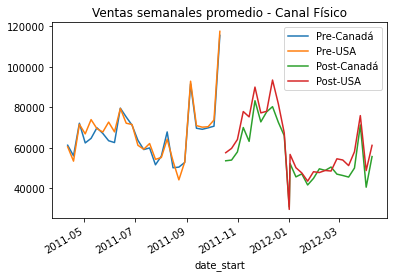

In [21]:
# La tabla pivote permite que hagamos esta gráfica, que vamos a agregar por pre o post BOPS y ubicación 
dataset_bm.pivot_table(index='date_start', columns=['after','usa'], values='sales', aggfunc='mean').plot()
plt.title('Ventas semanales promedio - Canal Físico')
plt.legend(['Pre-Canadá','Pre-USA','Post-Canadá','Post-USA'])
plt.show()

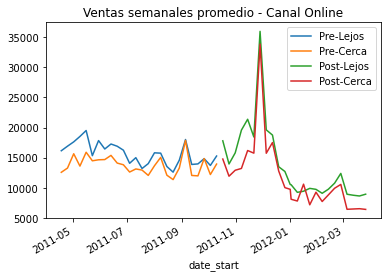

In [22]:
# La tabla pivote permite que hagamos esta gráfica, que vamos a agregar por pre o post BOPS y cercanía 
dataset_ol.pivot_table(index='date_start', columns=['after','close'], values='sales', aggfunc='mean').plot()
plt.title('Ventas semanales promedio - Canal Online')
plt.legend(['Pre-Lejos','Pre-Cerca','Post-Lejos','Post-Cerca'])
plt.show()

En este caso si podemos ver que hay un paralelo en las ventas pre BOPS para el canal físico y para el canal online, por lo que aplicar diferencias en diferencias estaría validado. 

Ahora que si tenemos en el caso del DID de 5.77% para el canal físico y un DID de -3.3% para el canal, podemos medir ese impacto en dinero para ambos canales:

In [23]:
Monto_Canal_Online = ol_pv.iloc[1,0] * DID_ol/100 # Recordemos que el valor está en millones
Monto_Canal_Fisico = bm_pv.iloc[1,0] * DID_bm/100 # Igual está en millones
Resultado = Monto_Canal_Online + Monto_Canal_Fisico # En millones
print(f"Resultado del canal online: {Monto_Canal_Online:.3f}M\n\
Resultado del canal físico: {Monto_Canal_Fisico:.3f}M\n\
Resultado combinado de ambos: {Resultado:.3f}M")

Resultado del canal online: -1.190M
Resultado del canal físico: 7.085M
Resultado combinado de ambos: 5.896M


En esta fórmula estamos tomando los valores del grupo de tratamiento (fila 1) del punto pre-BOPS (columna 0) y aplicamos el valor DID para calcular el efecto post BOPS. Esto nos indica que el programa BOPS ha significado 5.896 millones de impacto en las ventas.

#### Respuesta 2
Los millones que se ganaron por el programa BOPS fueron 5.896, el cual es el efecto medido sobre ambos canales con la pérdida en el canal online de -1.19M y la ganancia en el canal físico de 7.085M. 

### Referencias
[1] Epoch Converter. (9 de mayo del 2021). *Week Numbers for 2011*. Descargado de https://www.epochconverter.com/weeks/2011  
[2] Wikipedia. (9 de mayo del 2021). *Diferencia en diferencias*. Descargado de https://es.wikipedia.org/wiki/Diferencias_en_diferencias  
[3] Medium - Dataman AI. (9 de mayo del 2021). *Identify Causality by Difference in Differences*. Descargado de https://medium.com/dataman-in-ai/identify-causality-by-difference-in-differences-78ad8335fb7c  